In [1]:
import sys
import os
path = os.path.abspath(os.path.join('..','..'))
sys.path.append(path)

import numpy as np
from datetime import date, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from reservoirpy.wellproductivitypy import decline as dc

In [13]:
w = dc.wor_declination(slope=2e-6,bsw_i=0.94)

In [27]:
f= w.forecast(start_date=date(2020,5,21), end_date=date(2025,6,21),fq='2M', fluid_rate=5000)

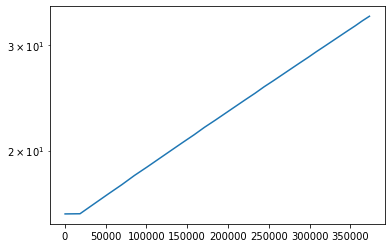

In [28]:
plt.plot(f['np'], f['wor'])
plt.yscale('log')

In [4]:
range_time = pd.Series(pd.date_range(start=date(2020,5,21),end=date(2020,5,30),freq='2D'))
fluid_rate = np.full(range_time.shape,1000)
slope = 2.4e-5
wor_i = 0.1

forecast = dc.wor_forecast(range_time,fluid_rate, slope, wor_i)
forecast

,qf,qo,qw,bsw,wor_1,wor,np
2020-05-21,1000,909.090909,90.909091,0.090909,1.100000,0.100000,909.090909
2020-05-23,1000,889.471012,110.528988,0.110529,1.124264,0.124264,2688.032933
2020-05-25,1000,852.294657,147.705343,0.147705,1.173303,0.173303,4392.622247
2020-05-27,1000,818.130750,181.869250,0.181869,1.222299,0.222299,6028.883748
2020-05-29,1000,786.625195,213.374805,0.213375,1.271253,0.271253,7602.134137
